In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 100

### London, UK, 2012

In [2]:
path1 = '../datasets_full/London/'
path2 = '../datasets_full/London_more/'
activity_df = pd.read_csv(path1 + 'london_economic_activity.csv') 
employment_df = pd.read_csv(path2 + 'workforce-jobs-ons.csv')

#### Economically active & Employment Rate by Sex

In [3]:
boroughs = ['Barking and Dagenham', 'Barnet', 'Bexley', 'Brent', 'Bromley',
            'Camden', 'Croydon', 'Ealing', 'Enfield', 'Greenwich', 'Hackney',
            'Hammersmith and Fulham', 'Haringey', 'Harrow', 'Havering',
            'Hillingdon', 'Hounslow', 'Islington', 'Kensington and Chelsea',
            'Kingston upon Thames', 'Lambeth', 'Lewisham', 'Merton', 'Newham',
            'Redbridge', 'Richmond upon Thames', 'Southwark', 'Sutton',
            'Tower Hamlets', 'Waltham Forest', 'Wandsworth', 'Westminster'] # 32 boroughs
regions = ['North East', 'North West', 'Yorkshire and The Humber',
           'East Midlands', 'West Midlands', 'East', 'South East',
           'South West', 'London'] # 9 regions
countries = ['England', 'Wales', 'Scotland', 'Northern Ireland']  # 4 countries

# Great Britain consists of 'England', 'Wales', 'Scotland'; 
# United Kingdom consists of Great Britain and Northern Ireland;

try:
    activity_df['year'] = np.array([s.split(' ')[2] for s in activity_df['year']]).astype('int')
except:
    pass
activity_df = activity_df.dropna()
# activity_df_boroughs = activity_df[activity_df['area'].isin(boroughs)]

In [4]:
activity_df_total = activity_df.groupby(['year', 'area']).sum()
activity_df_total['employment_rate'] = activity_df_total['economically_active']/activity_df_total['working_age']*100
activity_df_total = activity_df_total.reset_index(level='area')
activity_df = activity_df.set_index('year')
display(activity_df_total)

,area,economically_active,working_age,percent,confidence,employment_rate
year,,,,,,
2005,Barking and Dagenham,72400.0,105000.0,138.5,10.5,68.952381
2005,Barnet,159700.0,214700.0,149.2,11.0,74.382860
2005,Bexley,111800.0,140600.0,159.3,9.7,79.516358
2005,Brent,132200.0,184600.0,143.1,10.4,71.614301
2005,Bromley,156400.0,188900.0,165.8,8.7,82.795130
...,...,...,...,...,...,...
2019,Waltham Forest,150700.0,189000.0,159.4,11.7,79.735450
2019,Wandsworth,197700.0,235800.0,167.9,10.2,83.842239
2019,West Midlands,2806500.0,3610900.0,155.4,2.0,77.723005


In [5]:
employ_ratio = pd.pivot_table(activity_df, index=activity_df.index,
                              values=['economically_active', 'percent', 'confidence'], columns=['area', 'gender'])
display(employ_ratio.head())

confidence                                                  \
area   Barking and Dagenham      Barnet      Bexley      Brent      Bromley   
gender                    F    M      F    M      F    M     F    M       F   
year                                                                          
2005                    5.5  5.0    5.9  5.1    5.3  4.4   5.9  4.5     4.8   
2006                    5.4  5.0    5.5  4.8    5.1  4.2   6.0  5.3     5.2   
2007                    5.4  4.7    5.1  4.8    5.2  4.4   5.8  4.8     4.8   
2008                    5.1  4.7    5.0  4.4    5.4  4.7   5.4  4.1     5.0   
2009                    5.5  5.0    5.9  5.0    5.5  5.0   5.9  5.0     6.0   

             ...        percent                                             \
area         ... Waltham Forest       Wandsworth       West Midlands         
gender    M  ...              F     M          F     M             F     M   
year         ...                                                             
2005    3.9  ...           62.2  82.6       72.7  82.4          68.0  82.9   
2006    3.9  ...           67.7  76.5       70.5  84.7          68.1  82.9   
2007    3.5  ...           63.3  80.0       74.6  83.5          67.8  82.6   
2008    4.2  ...           58.4  81.0       76.1  86.3          68.2  82.5   
2009    4.5  ...           62.6  80.6       76.2  89.4          68.6  82.3   

                                                         
area   Westminster       Yorkshire and The Humber        
gender           F     M                        F     M  
year                                                     
2005          61.7  77.1                     68.9  83.1  
2006          62.3  73.3                     69.1  83.3  
2007          57.1  76.8                     68.8  82.2  
2008          59.9  77.3                     69.0  82.6  
2009          62.7  82.5                     69.0  81.7  

[5 rows x 288 columns]

In [19]:
[*regions, 'UK']

['North East',
 'North West',
 'Yorkshire and The Humber',
 'East Midlands',
 'West Midlands',
 'East',
 'South East',
 'South West',
 'London',
 'UK']

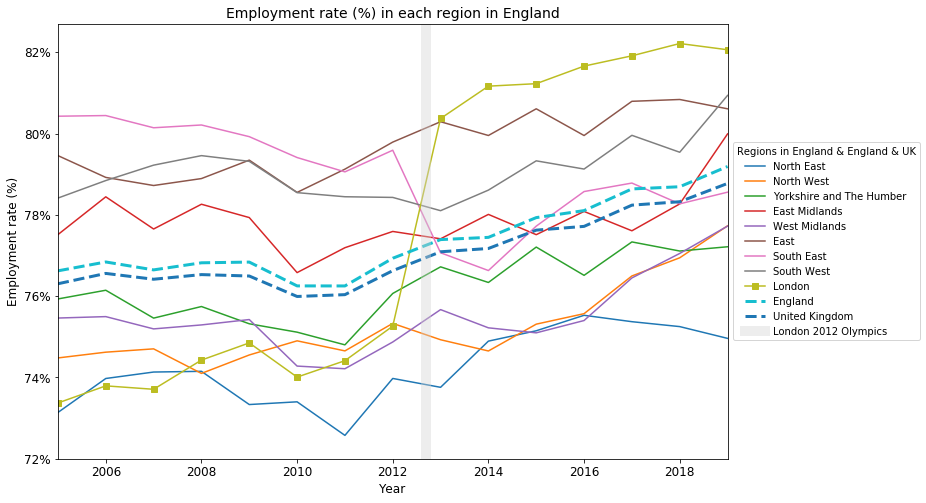

In [71]:
fig, ax = plt.subplots(figsize=(12, 8))
for i, x in enumerate([*regions, 'England', 'United Kingdom']):
    df = activity_df_total.loc[(activity_df_total['area']==x), 'employment_rate']
    if x == 'London':
        df.plot(ax=ax, label=x, marker='s')
    elif x in ['England', 'United Kingdom']:
        df.plot(ax=ax, label=x, linestyle='dashed', linewidth=3)
    else: 
        df.plot(ax=ax, label=x)
ax.set_title('Employment rate (%) in each region in England', fontsize=14);
ax.set_xlabel('Year', fontsize=12);
ax.set_ylabel('Employment rate (%)', fontsize=12);
ax.axvline(x=2012.7, linewidth=10, color='lightgray', alpha=0.4, label='London 2012 Olympics')
plt.xticks(fontsize=12);
plt.yticks(range(72, 83, 2), [str(x) + '%' for x in range(72, 83, 2)], fontsize=12) 
plt.legend()
ax.legend(loc='center left', title='Regions in England & England & UK', bbox_to_anchor=(1, 0.5));

In [84]:
df_boroughs.loc[df_boroughs.index=='London', 'employment_rate'].values

array([0.84979444])

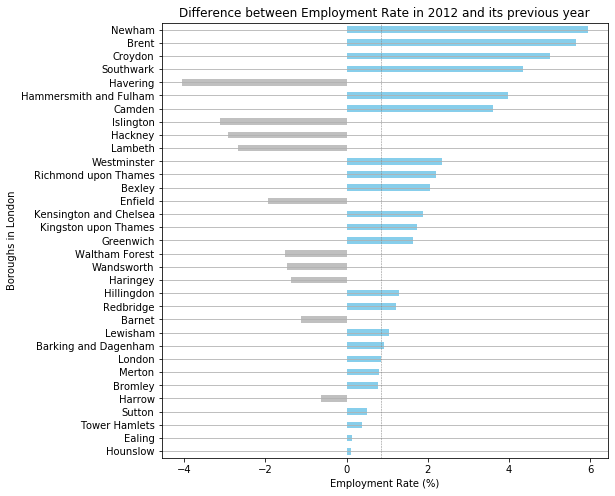

In [90]:
df3 = activity_df_total.loc[(activity_df_total.index >= 2011) & (activity_df_total.index <= 2012), :]
df3 = df3.reset_index()
rate_12 = df3.loc[df3['year'] == 2012, ['area', 'employment_rate']].set_index('area')
rate_11 = df3.loc[df3['year'] == 2011, ['area', 'employment_rate']].set_index('area')
diff = rate_12.subtract(rate_11)

fig, ax = plt.subplots(figsize=(8,8))

diff_sort = diff.reindex(diff['employment_rate'].abs().sort_values().index)
diff_sort['positive'] = (diff_sort['employment_rate'] > 0)

# plot 1
df_boroughs = diff_sort[diff_sort.index.isin([*boroughs, 'London'])]
df_boroughs['employment_rate'].plot.barh(ax=ax,color=df_boroughs.positive.map({True: 'skyblue', False: 'silver'}))
ax.yaxis.grid();
ax.axvline(x=df_boroughs.loc[df_boroughs.index=='London','employment_rate'].values, 
           linestyle='dashed', color='gray', linewidth=0.5)
ax.set_title('Difference between Employment Rate in 2012 and its previous year');
ax.set_xlabel('Employment Rate (%)');
ax.set_ylabel('Boroughs in London');

#### Number of workforce jobs

In [96]:
display(employment_df)

,date,area,total_workforce_jobs,employee_jobs,self_employment_jobs
0,Mar-05,UK,31356985,27579660,3493495
1,Jun-05,UK,31403800,27625580,3501806
2,Sep-05,UK,31541152,27730717,3533639
3,Dec-05,UK,31628586,27784245,3569405
4,Mar-06,UK,31708853,27831410,3607458
...,...,...,...,...,...
117,Mar-19,London,6105177,5300533,797732
118,Jun-19,London,6070558,5323508,738301
119,Sep-19,London,6053568,5259848,786221
120,Dec-19,London,6134150,5304787,821258


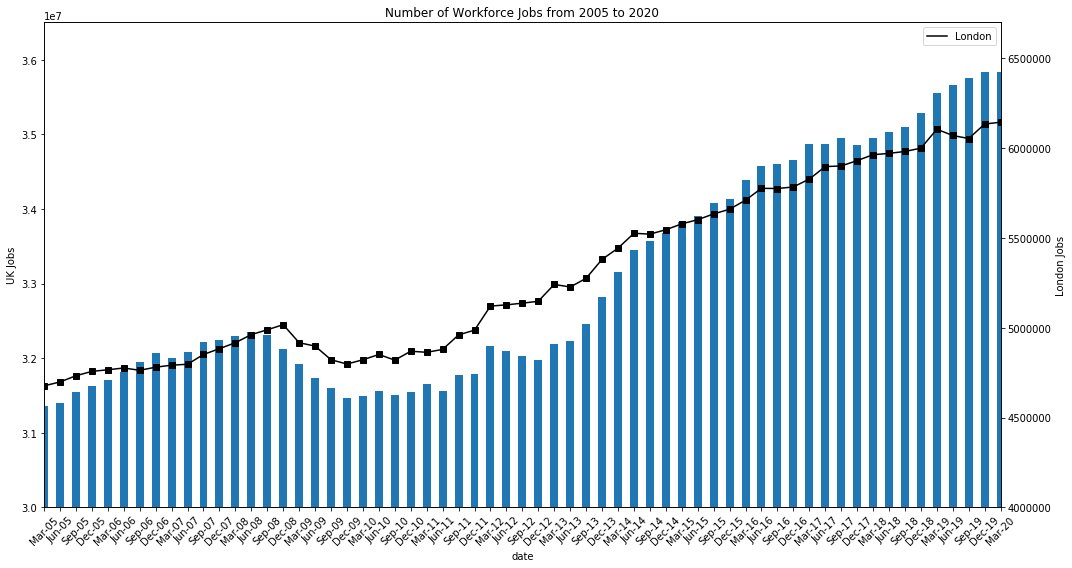

In [101]:
fig, ax1 = plt.subplots(figsize=(15,8))
try: 
#     employment_df['date'] = pd.to_datetime(employment_df['date'], format='%b-%y')
    employment_df = employment_df.set_index('date')
except:
    pass
# employment_df = employment_df['2005-03-01':'2015-03-01']

employment_df_UK = employment_df.loc[employment_df['area']=='UK', 'total_workforce_jobs']
employment_df_london = employment_df.loc[employment_df['area']=='London', 'total_workforce_jobs']

employment_df_UK.plot.bar(ax=ax1)
ax1.set_ylim(bottom=30000000, top=36500000)
ax1.set_ylabel('UK Jobs')
ax1.tick_params(axis='x', labelrotation=45)
ax1.set_title('Number of Workforce Jobs from 2005 to 2020')

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
employment_df_london.plot.line(ax=ax2, marker='s', color='k', label='London')
ax2.set_ylim(4000000, 6700000)
ax2.set_ylabel('London Jobs')
plt.legend()
fig.tight_layout()  # otherwise the right y-label is slightly clipped

# london jobs/uk jobs

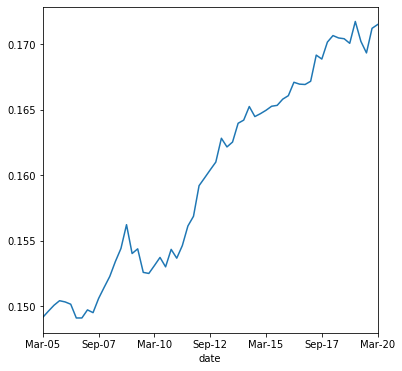

In [102]:
fig, ax = plt.subplots(figsize=(6,6))
(employment_df_london/employment_df_UK).plot()